In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest

df = pd.read_csv('../Data/AmesHousing_Cleaned.csv')

df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2924,2927,923276100,20,RL,68.0,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2925,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2926,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2928 non-null   int64  
 1   PID              2928 non-null   int64  
 2   MS SubClass      2928 non-null   int64  
 3   MS Zoning        2928 non-null   object 
 4   Lot Frontage     2928 non-null   float64
 5   Lot Area         2928 non-null   int64  
 6   Street           2928 non-null   object 
 7   Lot Shape        2928 non-null   object 
 8   Land Contour     2928 non-null   object 
 9   Utilities        2928 non-null   object 
 10  Lot Config       2928 non-null   object 
 11  Land Slope       2928 non-null   object 
 12  Neighborhood     2928 non-null   object 
 13  Condition 1      2928 non-null   object 
 14  Condition 2      2928 non-null   object 
 15  Bldg Type        2928 non-null   object 
 16  House Style      2928 non-null   object 
 17  Overall Qual  

In [3]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,1466.196380,7.143363e+08,57.399249,69.026639,10149.532104,6.097336,5.564208,1971.393784,1984.283128,101.165984,...,93.815915,47.565915,23.027322,2.594262,16.012978,2.244877,50.669740,6.216530,2007.789276,180902.242828
std,845.803282,1.887315e+08,42.649365,21.330800,7882.317610,1.408314,1.109934,30.221192,20.856124,178.676009,...,126.380951,67.495008,64.158147,25.149828,56.104969,35.609292,566.536198,2.715324,1.316239,79809.857829
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,734.750000,5.284770e+08,20.000000,60.000000,7440.750000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1466.500000,5.354532e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.250000,9.071811e+08,70.000000,78.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,163.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
df.skew(numeric_only=True)

Order              -0.001033
PID                 0.057290
MS SubClass         1.356681
Lot Frontage        1.669596
Lot Area           12.817877
Overall Qual        0.198667
Overall Cond        0.585717
Year Built         -0.605788
Year Remod/Add     -0.453203
Mas Vnr Area        2.618235
BsmtFin SF 1        1.416090
BsmtFin SF 2        4.139163
Bsmt Unf SF         0.923492
Total Bsmt SF       1.155844
1st Flr SF          1.469865
2nd Flr SF          0.865875
Low Qual Fin SF    12.113950
Gr Liv Area         1.274291
Bsmt Full Bath      0.616639
Bsmt Half Bath      3.940795
Full Bath           0.170713
Half Bath           0.696629
Bedroom AbvGr       0.304559
Kitchen AbvGr       4.312125
TotRms AbvGrd       0.752684
Fireplaces          0.739307
Garage Yr Blt      -0.463055
Garage Cars        -0.218496
Garage Area         0.244628
Wood Deck SF        1.841847
Open Porch SF       2.534605
Enclosed Porch      4.012902
3Ssn Porch         11.399820
Screen Porch        3.955879
Pool Area     

In [5]:
df.kurtosis(numeric_only=True)

Order               -1.199443
PID                 -1.994989
MS SubClass          1.383536
Lot Frontage        14.132269
Lot Area           264.883778
Overall Qual         0.044264
Overall Cond         1.481924
Year Built          -0.497049
Year Remod/Add      -1.340183
Mas Vnr Area         9.361552
BsmtFin SF 1         6.864415
BsmtFin SF 2        18.773674
Bsmt Unf SF          0.409172
Total Bsmt SF        9.142703
1st Flr SF           6.974529
2nd Flr SF          -0.416500
Low Qual Fin SF    175.484379
Gr Liv Area          4.141289
Bsmt Full Bath      -0.747989
Bsmt Half Bath      14.921740
Full Bath           -0.540820
Half Bath           -1.031813
Bedroom AbvGr        1.893571
Kitchen AbvGr       19.853051
TotRms AbvGrd        1.152888
Fireplaces           0.101405
Garage Yr Blt        1.452089
Garage Cars          0.246559
Garage Area          0.958565
Wood Deck SF         6.750696
Open Porch SF       10.949238
Enclosed Porch      28.467331
3Ssn Porch         149.883453
Screen Por

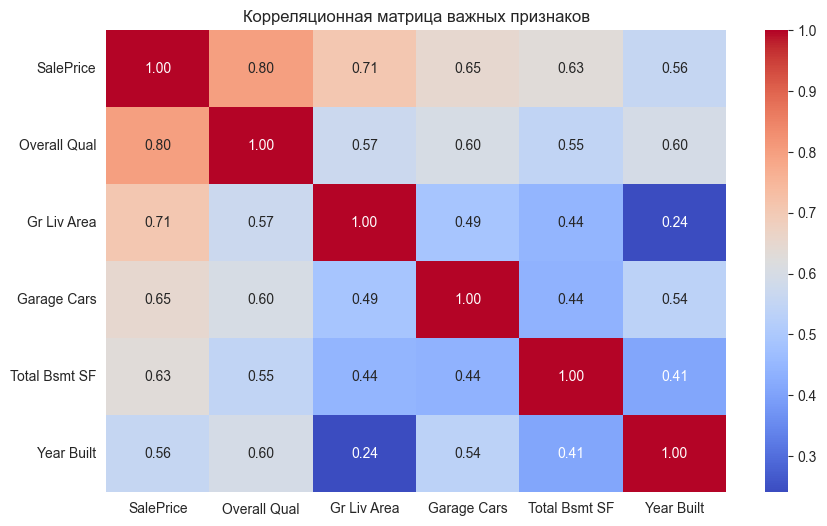

In [6]:
important_features = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built']

plt.figure(figsize=(10, 6))
sns.heatmap(df[important_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Корреляционная матрица важных признаков")
plt.show()

In [7]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:6]

Overall Qual     0.798682
Gr Liv Area      0.706452
Garage Cars      0.648063
Garage Area      0.641652
Total Bsmt SF    0.631942
Name: SalePrice, dtype: float64

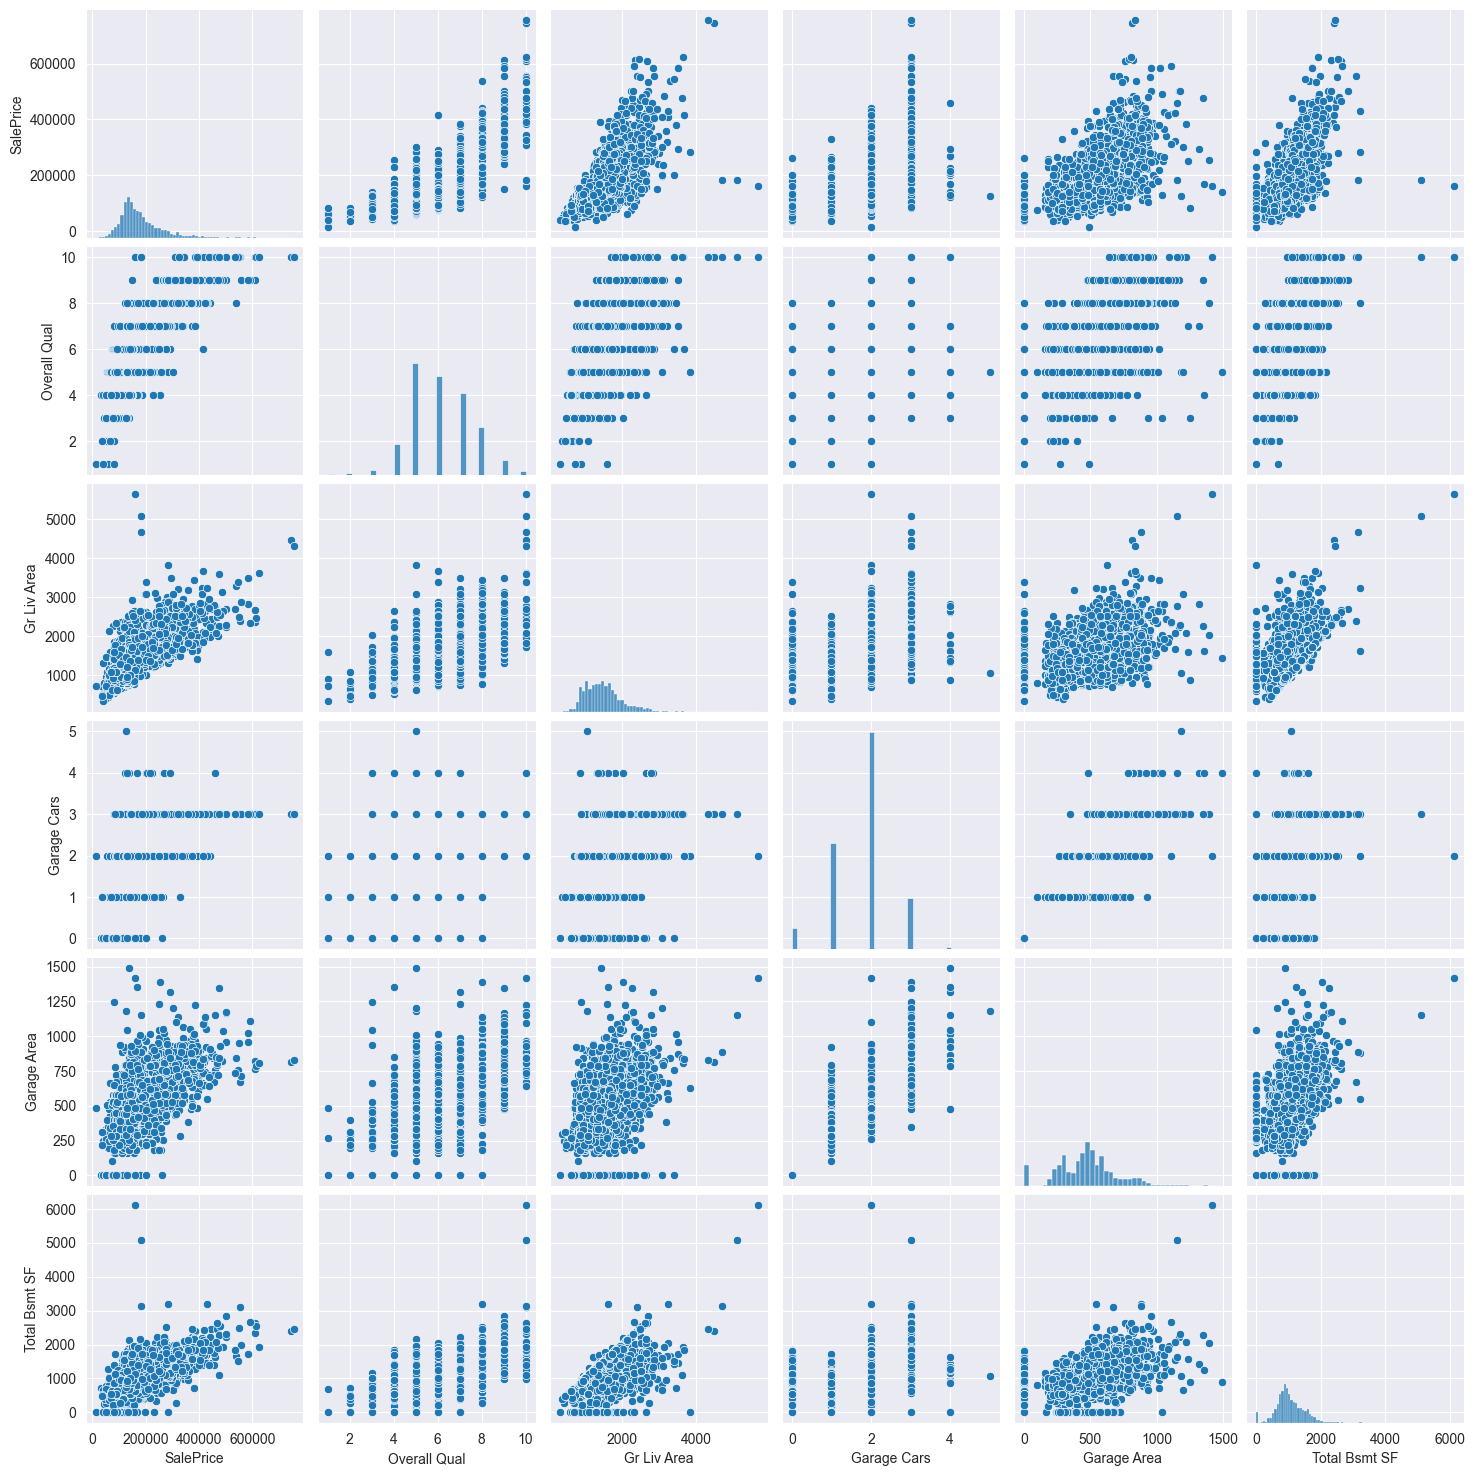

In [8]:
selected_columns = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF']
sns.pairplot(df[selected_columns])
plt.show()

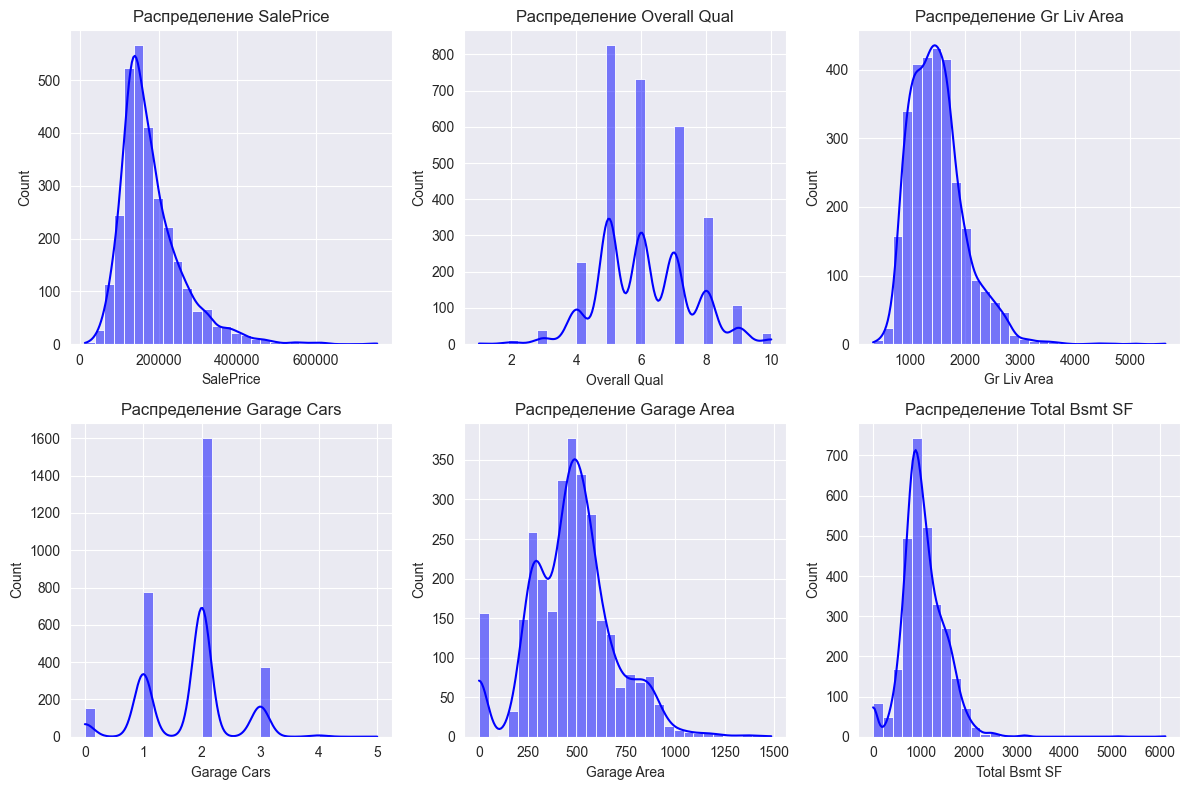

In [9]:
columns = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Распределение {col}')

plt.tight_layout()
plt.show()

In [10]:
for col in columns:
    stat, p = shapiro(df[col])
    print(f"{col}: Stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(" ✅ Распределение похоже на нормальное (не отвергаем H0)")
    else:
        print(" ❌ Распределение НЕ нормальное (отвергаем H0)")
    print("-" * 50)

SalePrice: Stat=0.875, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Overall Qual: Stat=0.948, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Gr Liv Area: Stat=0.934, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Garage Cars: Stat=0.846, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Garage Area: Stat=0.975, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Total Bsmt SF: Stat=0.939, p=0.000
 ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------


In [11]:
for col in columns:
    stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f"{col}: Stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print("  ✅ Распределение похоже на нормальное (не отвергаем H0)")
    else:
        print("  ❌ Распределение НЕ нормальное (отвергаем H0)")
    print("-" * 50)

SalePrice: Stat=0.124, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Overall Qual: Stat=0.160, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Gr Liv Area: Stat=0.067, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Garage Cars: Stat=0.301, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Garage Area: Stat=0.073, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------
Total Bsmt SF: Stat=0.069, p=0.000
  ❌ Распределение НЕ нормальное (отвергаем H0)
--------------------------------------------------


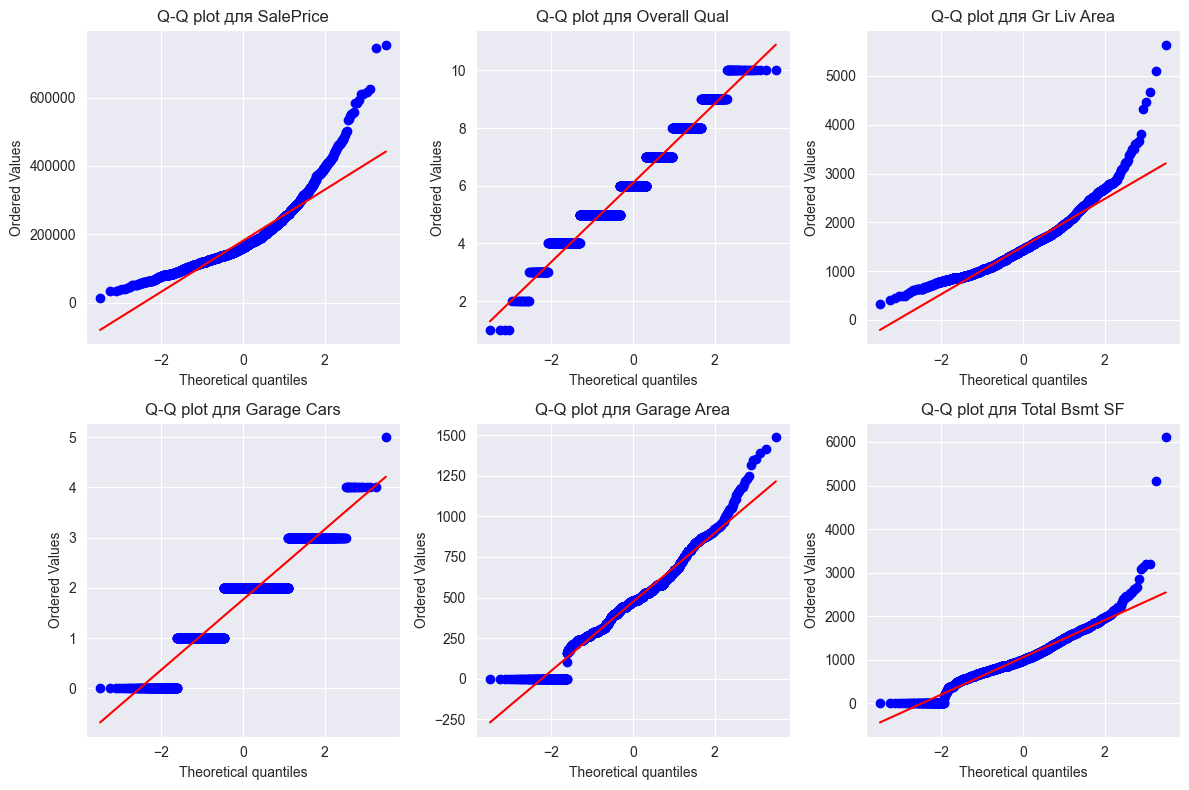

In [12]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot для {col}")

plt.tight_layout()
plt.show()